In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
style_data_21 = pd.read_csv('../../data/raw/fantasy/teams_21.csv')
style_data_22 = pd.read_csv('../../data/raw/fantasy/teams_22.csv')
style_data_23 = pd.read_csv('../../data/raw/fantasy/teams_23.csv')
style_data_24 = pd.read_csv('../../data/raw/fantasy/teams_24.csv')
style_data_25 = pd.read_csv('../../data/raw/fantasy/teams_25.csv')

In [3]:
style_data_21['season'] = '2020-2021'
style_data_22['season'] = '2021-2022'
style_data_23['season'] = '2022-2023'
style_data_24['season'] = '2023-2024'
style_data_25['season'] = '2024-2025'

In [4]:
#concat all df, just keep columns name, strength_overall_home and strength_overall_away
style_data = pd.concat([style_data_21, style_data_22, style_data_23, style_data_24, style_data_25])
style_data = style_data[['name', 'season', 'strength_overall_home', 'strength_overall_away']]
style_data

,name,season,strength_overall_home,strength_overall_away
0,Arsenal,2020-2021,1200,1250
1,Aston Villa,2020-2021,1100,1160
2,Brighton,2020-2021,1130,1130
3,Burnley,2020-2021,1060,1070
4,Chelsea,2020-2021,1250,1280
...,...,...,...,...
15,Nott'm Forest,2024-2025,1130,1100
16,Southampton,2024-2025,1060,1065
17,Spurs,2024-2025,1220,1260
18,West Ham,2024-2025,1100,1100


In [5]:
style_data['name'].unique()

array(['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Leicester', 'Leeds',
       'Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Sheffield Utd',
       'Southampton', 'Spurs', 'West Brom', 'West Ham', 'Wolves',
       'Brentford', 'Norwich', 'Watford', 'Bournemouth', "Nott'm Forest",
       'Luton', 'Ipswich'], dtype=object)

In [6]:
style_team_name = {
    'Arsenal': 'ARS',
    'Aston Villa': 'AVL',
    'Brighton': 'BHA',
    'Burnley': 'BUR',
    'Chelsea': 'CHE',
    'Crystal Palace': 'CRY',
    'Everton': 'EVE',
    'Fulham': 'FUL',
    'Leicester': 'LEI',
    'Leeds': 'LEE',
    'Liverpool': 'LIV',
    'Man City': 'MCI',
    'Man Utd': 'MUN',
    'Newcastle': 'NEW',
    'Sheffield Utd': 'SHU',
    'Southampton': 'SOU',
    'Spurs': 'TOT',
    'West Brom': 'WBA',
    'West Ham': 'WHU',
    'Wolves': 'WOL',
    'Brentford': 'BRE',
    'Norwich': 'NOR',
    'Watford': 'WAT',
    'Bournemouth': 'BOU',
    'Nott\'m Forest': 'NFO',
    'Luton': 'LUT',
    'Ipswich': 'IPS'
}

In [7]:
style_data['name'] = style_data['name'].map(style_team_name)
style_data

,name,season,strength_overall_home,strength_overall_away
0,ARS,2020-2021,1200,1250
1,AVL,2020-2021,1100,1160
2,BHA,2020-2021,1130,1130
3,BUR,2020-2021,1060,1070
4,CHE,2020-2021,1250,1280
...,...,...,...,...
15,NFO,2024-2025,1130,1100
16,SOU,2024-2025,1060,1065
17,TOT,2024-2025,1220,1260
18,WHU,2024-2025,1100,1100


In [8]:
# Equation -> https://www.eloratings.net/about

def ELO_rating(rating_t1, rating_t2, score_t1, score_t2, info):
    # t1 -> team 1
    # t2 -> team2
    # info "h" -> home, "a" -> away
    K = 50
    goal_diff = score_t1 - score_t2
    dr = rating_t1 - rating_t2
    dr += 100

    if info == 'a':
        goal_diff = -goal_diff
        dr = -dr + 100

    if goal_diff == 2:
        K += K * 0.5
    elif goal_diff == 3:
        K += K*0.75
    elif goal_diff > 3:
        K+= (0.75 + (goal_diff - 3)/8) * K

    if goal_diff > 0:
        W = 1
    elif goal_diff < 0:
        W = 0
    else:
        W = 0.5
    We = 1/(np.power(10,-dr/400)+1)
    # just keep 3 decimal places
    return round(rating_t1 + K * (W-We), 3)

In [3]:
fifa_data_21 = pd.read_csv('../../data/raw/sofifa/teams_data_21.csv')
fifa_data_22 = pd.read_csv('../../data/raw/sofifa/teams_data_22.csv')
fifa_data_23 = pd.read_csv('../../data/raw/sofifa/teams_data_23.csv')
fifa_data_24 = pd.read_csv('../../data/raw/sofifa/teams_data_24.csv')
fifa_data_25 = pd.read_csv('../../data/raw/sofifa/teams_data_25.csv')

In [4]:
fifa_data_21['season'] = '2020-2021'
fifa_data_22['season'] = '2021-2022'
fifa_data_23['season'] = '2022-2023'
fifa_data_24['season'] = '2023-2024'
fifa_data_25['season'] = '2024-2025'

In [5]:
fifa_data = pd.concat([fifa_data_21, fifa_data_22, fifa_data_23, fifa_data_24, fifa_data_25])
fifa_data.head(10)

,team_name,overall_rating,attack_rating,midfield_rating,defence_rating,avg_age,season
0,Liverpool,85,86,83,80,25.91,2020-2021
1,Manchester City,85,85,86,83,25.27,2020-2021
2,Chelsea,82,82,84,82,26.00,2020-2021
3,Manchester United,82,83,82,82,24.45,2020-2021
4,Tottenham Hotspur,82,89,82,81,26.82,2020-2021
5,Arsenal,80,83,79,79,24.73,2020-2021
6,Leicester City,80,80,81,79,25.73,2020-2021
7,Everton,79,81,79,80,26.82,2020-2021
8,Wolverhampton Wanderers,79,77,81,78,25.45,2020-2021
9,West Ham United,78,79,79,77,27.73,2020-2021


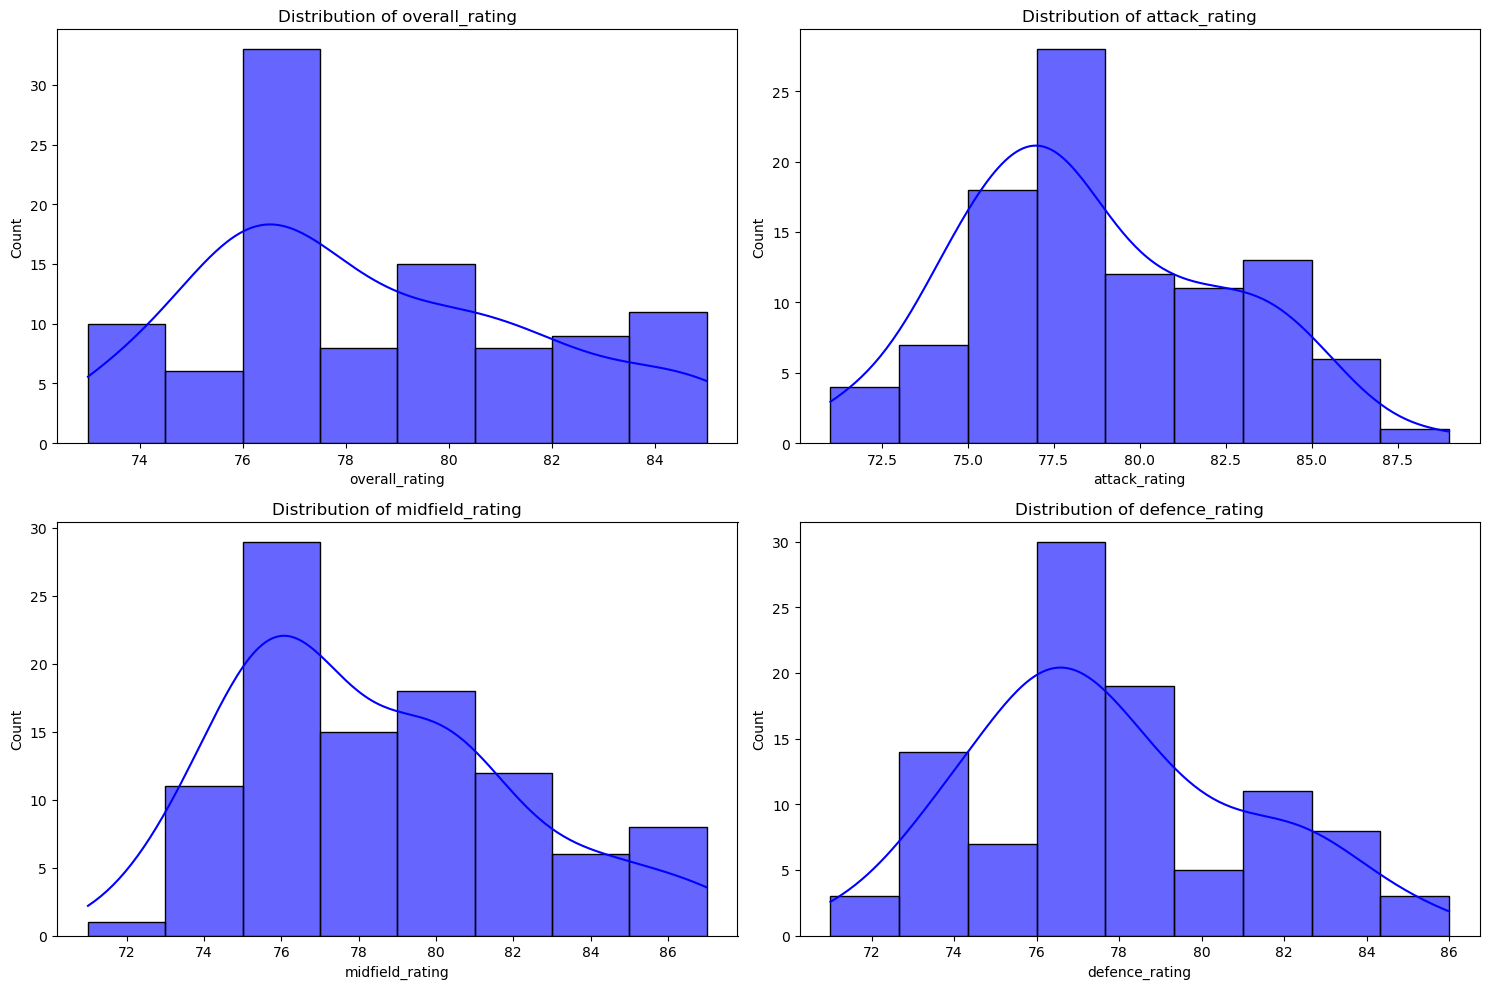

In [10]:
import math
stat_features = ['overall_rating',
                  'attack_rating', 'midfield_rating', 'defence_rating']
num_features = len(stat_features)
cols = 2
rows = math.ceil(num_features / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten() 
for i, feature in enumerate(stat_features):
    sns.histplot(fifa_data[feature], kde=True, ax=axes[i], color='blue', alpha=0.6)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
fifa_data['team_name'].unique()

array(['Liverpool', 'Manchester City', 'Chelsea', 'Manchester United',
       'Tottenham Hotspur', 'Arsenal', 'Leicester City', 'Everton',
       'Wolverhampton Wanderers', 'West Ham United', 'Aston Villa',
       'Burnley', 'Crystal Palace', 'Leeds United', 'Newcastle United',
       'Southampton', 'Brighton & Hove Albion', 'Fulham',
       'Sheffield United', 'West Bromwich Albion', 'Watford', 'Brentford',
       'Norwich City', 'Nottingham Forest', 'AFC Bournemouth',
       'Luton Town', 'Ipswich Town'], dtype=object)

In [13]:
fifa_team_name = {
    'Liverpool': 'LIV',
    'Manchester City': 'MCI',
    'Chelsea': 'CHE',
    'Manchester United': 'MUN',
    'Tottenham Hotspur': 'TOT',
    'Arsenal': 'ARS',
    'Leicester City': 'LEI',
    'Everton': 'EVE',
    'Wolverhampton Wanderers': 'WOL',
    'West Ham United': 'WHU',
    'Aston Villa': 'AVL',
    'Burnley': 'BUR',
    'Crystal Palace': 'CRY',
    'Leeds United': 'LEE',
    'Newcastle United': 'NEW',
    'Southampton': 'SOU',
    'Brighton & Hove Albion': 'BHA',
    'Fulham': 'FUL',
    'Sheffield United': 'SHU',
    'West Bromwich Albion': 'WBA',
    'Watford': 'WAT',
    'Brentford': 'BRE',
    'Norwich City': 'NOR',
    'Nottingham Forest': 'NFO',
    'AFC Bournemouth': 'BOU',
    'Luton Town': 'LUT',
    'Ipswich Town': 'IPS'
}

In [14]:
fifa_data['team_name'] = fifa_data['team_name'].map(fifa_team_name)
fifa_data.head(10)

,team_name,overall_rating,attack_rating,midfield_rating,defence_rating,avg_age,season
0,LIV,85,86,83,80,25.91,2020-2021
1,MCI,85,85,86,83,25.27,2020-2021
2,CHE,82,82,84,82,26.00,2020-2021
3,MUN,82,83,82,82,24.45,2020-2021
4,TOT,82,89,82,81,26.82,2020-2021
5,ARS,80,83,79,79,24.73,2020-2021
6,LEI,80,80,81,79,25.73,2020-2021
7,EVE,79,81,79,80,26.82,2020-2021
8,WOL,79,77,81,78,25.45,2020-2021
9,WHU,78,79,79,77,27.73,2020-2021


In [15]:
style_fifa_data = pd.merge(style_data, fifa_data, left_on=['name', 'season'], right_on=['team_name', 'season'])
style_fifa_data.drop(columns=['team_name'], inplace=True)
style_fifa_data.rename(columns={'name': 'team'}, inplace=True)
style_fifa_data.head()

,team,season,strength_overall_home,strength_overall_away,overall_rating,attack_rating,midfield_rating,defence_rating,avg_age
0,ARS,2020-2021,1200,1250,80,83,79,79,24.73
1,AVL,2020-2021,1100,1160,77,77,77,77,24.18
2,BHA,2020-2021,1130,1130,75,75,76,76,25.64
3,BUR,2020-2021,1060,1070,76,75,76,77,27.36
4,CHE,2020-2021,1250,1280,82,82,84,82,26.00


In [16]:
# # map team name for style_fifa_data
# import json 
# with open('../../data/team_map.json') as f:
#     team_map = json.load(f)

# style_fifa_data['team'] = style_fifa_data['team'].map(team_map)
# style_fifa_data

In [17]:
matches_stats_data = pd.read_csv('../../data/raw/fbdata_fbref.csv')
matches_stats_data.head()

,hometeam,awayteam,date,season,round,gf,ga,h_form_gf,h_form_ga,h_form_xg,...,a_form_progressive passing dist,a_form_tackles tklw,a_form_challenges tkl%,a_form_saves,b365h,b365d,b365a,result_A,result_D,result_H
0,ARS,WHU,2020-09-19,2020-2021,2,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.53,4.50,5.50,False,False,True
1,ARS,SHU,2020-10-04,2020-2021,4,2.0,1.0,0.418610,-0.348960,-0.366173,...,-1.893648,-1.005312,-0.234674,-1.002884,1.57,4.00,6.00,False,False,True
2,ARS,LEI,2020-10-25,2020-2021,6,0.0,1.0,0.418610,-0.348960,-0.667352,...,-0.574489,-0.049237,1.277703,-0.500357,1.90,3.75,3.80,True,False,False
3,ARS,AVL,2020-11-08,2020-2021,8,0.0,3.0,-0.093103,-0.348960,-0.727587,...,-0.510614,0.633674,-0.131633,0.253435,1.65,4.10,5.00,True,False,False
4,ARS,WOL,2020-11-29,2020-2021,10,1.0,2.0,-0.348960,0.034825,-0.516762,...,0.076296,-0.322401,-0.005324,-0.500357,2.05,3.40,3.75,True,False,False


In [18]:
# Merge lấy h_feature từ style_fifa_data
matches_stats_data = matches_stats_data.merge(
    style_fifa_data, 
    left_on=['hometeam', 'season'], 
    right_on=['team', 'season'], 
    how='left', 
    suffixes=('', '_h')
)

h_feature_cols = ['strength_overall_home', 'strength_overall_away', 'overall_rating',
                  'attack_rating', 'midfield_rating', 'defence_rating', 'avg_age']
matches_stats_data.rename(
    columns={col: f"h_{col}" for col in h_feature_cols}, 
    inplace=True
)

# Merge lấy a_feature từ style_fifa_data
matches_stats_data = matches_stats_data.merge(
    style_fifa_data, 
    left_on=['awayteam', 'season'], 
    right_on=['team', 'season'], 
    how='left', 
    suffixes=('', '_a'),
)
matches_stats_data.rename(
    columns={col: f"a_{col}" for col in h_feature_cols}, 
    inplace=True
)

cols_to_drop = ['team', 'team_a', 'h_strength_overall_away', 'a_strength_overall_home']
matches_stats_data.drop(columns=cols_to_drop, inplace=True)

matches_stats_data.head()

,hometeam,awayteam,date,season,round,gf,ga,h_form_gf,h_form_ga,h_form_xg,...,h_attack_rating,h_midfield_rating,h_defence_rating,h_avg_age,a_strength_overall_away,a_overall_rating,a_attack_rating,a_midfield_rating,a_defence_rating,a_avg_age
0,ARS,WHU,2020-09-19,2020-2021,2,2.0,1.0,NaN,NaN,NaN,...,83,79,79,24.73,1260,78,79,79,77,27.73
1,ARS,SHU,2020-10-04,2020-2021,4,2.0,1.0,0.418610,-0.348960,-0.366173,...,83,79,79,24.73,1040,73,71,74,73,26.64
2,ARS,LEI,2020-10-25,2020-2021,6,0.0,1.0,0.418610,-0.348960,-0.667352,...,83,79,79,24.73,1260,80,80,81,79,25.73
3,ARS,AVL,2020-11-08,2020-2021,8,0.0,3.0,-0.093103,-0.348960,-0.727587,...,83,79,79,24.73,1160,77,77,77,77,24.18
4,ARS,WOL,2020-11-29,2020-2021,10,1.0,2.0,-0.348960,0.034825,-0.516762,...,83,79,79,24.73,1110,79,77,81,78,25.45


In [19]:
matches_stats_data.columns

Index(['hometeam', 'awayteam', 'date', 'season', 'round', 'gf', 'ga',
       'h_form_gf', 'h_form_ga', 'h_form_xg', 'h_form_xga',
       'h_form_standard sot', 'h_form_kp', 'h_form_xa', 'h_form_poss_x',
       'h_form_touches att pen', 'h_form_carries prgdist',
       'h_form_progressive passing dist', 'h_form_tackles tklw',
       'h_form_challenges tkl%', 'h_form_saves', 'a_form_gf', 'a_form_ga',
       'a_form_xg', 'a_form_xga', 'a_form_standard sot', 'a_form_kp',
       'a_form_xa', 'a_form_poss_x', 'a_form_touches att pen',
       'a_form_carries prgdist', 'a_form_progressive passing dist',
       'a_form_tackles tklw', 'a_form_challenges tkl%', 'a_form_saves',
       'b365h', 'b365d', 'b365a', 'result_A', 'result_D', 'result_H',
       'h_strength_overall_home', 'h_overall_rating', 'h_attack_rating',
       'h_midfield_rating', 'h_defence_rating', 'h_avg_age',
       'a_strength_overall_away', 'a_overall_rating', 'a_attack_rating',
       'a_midfield_rating', 'a_defence_rating', 

In [19]:
matches_stats_data = matches_stats_data.sort_values(by=['season', 'date']).reset_index(drop=True)

# Lưu ELO ratings cho từng mùa giải
rating_by_season = {}

# Hàm khởi tạo ELO cho trận đầu tiên của mỗi mùa
def initialize_elo_for_first_round(df):
    season = df.iloc[0]['season']
    if season not in rating_by_season:
        rating_by_season[season] = {}

    # Khởi tạo ELO cho các đội trong mùa giải
    for _, row in df.iterrows():
        home_team = row['hometeam']
        away_team = row['awayteam']
        # Lấy giá trị khởi tạo từ h_strength_overall_home và a_strength_overall_away
        rating_by_season[season][home_team] = row['h_strength_overall_home']
        rating_by_season[season][away_team] = row['a_strength_overall_away']

# Áp dụng khởi tạo cho vòng đấu đầu tiên của mỗi mùa
for season, group in matches_stats_data.groupby('season'):
    first_round = group[group['round'] == 1]
    initialize_elo_for_first_round(first_round)

def calculate_elo(row):
    season = row['season']
    home_team = row['hometeam']
    away_team = row['awayteam']
    gf = row['gf'] 
    ga = row['ga']

    # Lấy ELO hiện tại từ dictionary
    soh = rating_by_season[season].get(home_team, row['h_strength_overall_home'])
    soa = rating_by_season[season].get(away_team, row['a_strength_overall_away'])

    # Tính toán ELO mới dựa trên kết quả trận đấu
    new_soh = ELO_rating(soh, soa, gf, ga, 'h')
    new_soa = ELO_rating(soh, soa, gf, ga, 'a')

    # Cập nhật ELO mới 
    rating_by_season[season][home_team] = new_soh
    rating_by_season[season][away_team] = new_soa

    # Trả về ELO cũ (trước khi cập nhật) cho cột soh và soa
    return pd.Series([soh, soa], index=['soh', 'soa'])

matches_stats_data[['soh', 'soa']] = matches_stats_data.apply(calculate_elo, axis=1)

matches_stats_data

,hometeam,awayteam,date,season,round,gf,ga,h_form_gf,h_form_ga,h_form_xg,...,h_defence_rating,h_avg_age,a_strength_overall_away,a_overall_rating,a_attack_rating,a_midfield_rating,a_defence_rating,a_avg_age,soh,soa
0,CRY,SOU,2020-09-12,2020-2021,1,1.0,0.0,NaN,NaN,NaN,...,75,28.55,1100,76,77,77,76,26.09,1090.000,1100.000
1,FUL,ARS,2020-09-12,2020-2021,1,0.0,3.0,NaN,NaN,NaN,...,74,24.45,1250,80,83,79,79,24.73,1090.000,1250.000
2,LIV,LEE,2020-09-12,2020-2021,1,4.0,3.0,NaN,NaN,NaN,...,80,25.91,1170,76,78,76,75,25.09,1250.000,1170.000
3,WHU,NEW,2020-09-12,2020-2021,1,0.0,2.0,NaN,NaN,NaN,...,77,27.73,1070,76,77,75,74,26.91,1230.000,1070.000
4,TOT,EVE,2020-09-13,2020-2021,1,0.0,1.0,NaN,NaN,NaN,...,81,26.82,1130,79,81,79,80,26.82,1190.000,1130.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,SOU,EVE,2024-11-02,2024-2025,10,1.0,0.0,-0.041932,0.725637,0.115712,...,74,25.55,1100,76,76,76,76,29.27,1007.735,1024.327
1616,WOL,CRY,2024-11-02,2024-2025,10,2.0,2.0,-0.195446,1.186179,-0.221608,...,77,26.64,1095,78,78,78,77,25.27,1552.382,1333.609
1617,MUN,CHE,2024-11-03,2024-2025,10,1.0,1.0,-0.195446,0.265096,0.139806,...,81,26.27,1230,81,81,81,79,22.64,1251.292,1492.497
1618,TOT,AVL,2024-11-03,2024-2025,10,4.0,1.0,0.572123,-0.348960,0.766257,...,83,25.36,1220,80,85,80,80,26.09,1295.252,1238.554


In [20]:
matches_stats_data.isnull().sum()

hometeam                            0
awayteam                            0
date                                0
season                              0
round                               0
gf                                  0
ga                                  0
h_form_gf                          27
h_form_ga                          27
h_form_xg                          27
h_form_xga                         27
h_form_standard sot                27
h_form_kp                          27
h_form_xa                          27
h_form_poss_x                      27
h_form_touches att pen             27
h_form_carries prgdist             27
h_form_progressive passing dist    27
h_form_tackles tklw                27
h_form_challenges tkl%             27
h_form_saves                       27
a_form_gf                          27
a_form_ga                          27
a_form_xg                          27
a_form_xga                         27
a_form_standard sot                27
a_form_kp   

In [21]:
matches_stats_data[(matches_stats_data['hometeam'] == 'LIV') & (matches_stats_data['season'] == '2020-2021')]

,hometeam,awayteam,date,season,round,gf,ga,h_form_gf,h_form_ga,h_form_xg,...,h_defence_rating,h_avg_age,a_strength_overall_away,a_overall_rating,a_attack_rating,a_midfield_rating,a_defence_rating,a_avg_age,soh,soa
2,LIV,LEE,2020-09-12,2020-2021,1,4.0,3.0,NaN,NaN,NaN,...,80,25.91,1170,76,78,76,75,25.09,1250.000,1170.000
27,LIV,ARS,2020-09-28,2020-2021,3,3.0,1.0,1.953748,1.186179,1.561368,...,80,25.91,1250,80,83,79,79,24.73,1178.172,1138.064
50,LIV,SHU,2020-10-24,2020-2021,6,2.0,1.0,1.569963,0.418610,1.561368,...,80,25.91,1040,73,71,74,73,26.64,1442.775,1120.423
60,LIV,WHU,2020-10-31,2020-2021,7,2.0,1.0,1.186179,0.162753,1.400739,...,80,25.91,1260,78,79,79,77,27.73,1446.816,1459.902
84,LIV,LEI,2020-11-22,2020-2021,9,3.0,0.0,0.994287,0.034825,1.139718,...,80,25.91,1260,80,80,81,79,25.73,1456.027,1144.098
102,LIV,WOL,2020-12-06,2020-2021,11,4.0,0.0,1.032665,-0.195446,1.320425,...,80,25.91,1110,79,77,81,78,25.45,1239.348,1151.142
123,LIV,TOT,2020-12-16,2020-2021,13,2.0,1.0,1.032665,-0.655987,0.959011,...,80,25.91,1250,82,89,82,81,26.82,1038.529,1284.801
144,LIV,WBA,2020-12-27,2020-2021,15,1.0,1.0,0.879151,-0.655987,0.549409,...,80,25.91,1040,73,74,74,72,25.64,1024.850,1061.782
175,LIV,MUN,2021-01-17,2020-2021,19,0.0,0.0,0.725637,-0.655987,0.356655,...,80,25.91,1320,82,83,82,82,24.45,890.143,1336.165
183,LIV,BUR,2021-01-21,2020-2021,18,0.0,1.0,0.418610,-0.809501,0.236183,...,80,25.91,1070,76,75,76,77,27.36,909.140,1050.556


In [22]:
from sklearn.preprocessing import StandardScaler

need_scale_cols = ['h_strength_overall_home', 'h_overall_rating', 'h_attack_rating',
       'h_midfield_rating', 'h_defence_rating', 'h_avg_age',
       'a_strength_overall_away', 'a_overall_rating', 'a_attack_rating',
       'a_midfield_rating', 'a_defence_rating', 'a_avg_age', 'soh', 'soa']

scaler = StandardScaler()
matches_stats_data[need_scale_cols] = scaler.fit_transform(matches_stats_data[need_scale_cols])
matches_stats_data

,hometeam,awayteam,date,season,round,gf,ga,h_form_gf,h_form_ga,h_form_xg,...,h_defence_rating,h_avg_age,a_strength_overall_away,a_overall_rating,a_attack_rating,a_midfield_rating,a_defence_rating,a_avg_age,soh,soa
0,CRY,SOU,2020-09-12,2020-2021,1,1.0,0.0,NaN,NaN,NaN,...,-0.778312,2.010296,-0.737703,-0.711706,-0.399709,-0.354526,-0.480235,0.127871,-0.313369,-0.245059
1,FUL,ARS,2020-09-12,2020-2021,1,0.0,3.0,NaN,NaN,NaN,...,-1.076389,-1.127079,0.811999,0.481221,1.152498,0.188065,0.413996,-0.912819,-0.313369,0.666784
2,LIV,LEE,2020-09-12,2020-2021,1,4.0,3.0,NaN,NaN,NaN,...,0.712073,-0.009867,-0.014509,-0.711706,-0.141008,-0.625821,-0.778312,-0.637343,0.635920,0.180468
3,WHU,NEW,2020-09-12,2020-2021,1,0.0,2.0,NaN,NaN,NaN,...,-0.182158,1.382821,-1.047643,-0.711706,-0.399709,-0.897117,-1.076389,0.755346,0.517259,-0.427427
4,TOT,EVE,2020-09-13,2020-2021,1,0.0,1.0,NaN,NaN,NaN,...,1.010150,0.686477,-0.427762,0.182989,0.635096,0.188065,0.712073,0.686477,0.279936,-0.062690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,SOU,EVE,2024-11-02,2024-2025,10,1.0,0.0,-0.041932,0.725637,0.115712,...,-1.076389,-0.285344,-0.737703,-0.711706,-0.658411,-0.625821,-0.480235,2.561250,-0.801452,-0.705071
1616,WOL,CRY,2024-11-02,2024-2025,10,2.0,2.0,-0.195446,1.186179,-0.221608,...,-0.182158,0.548738,-0.789360,-0.115243,-0.141008,-0.083231,-0.182158,-0.499604,2.429969,1.175040
1617,MUN,CHE,2024-11-03,2024-2025,10,1.0,1.0,-0.195446,0.265096,0.139806,...,1.010150,0.265609,0.605372,0.779452,0.635096,0.730655,0.413996,-2.512115,0.643585,2.140912
1618,TOT,AVL,2024-11-03,2024-2025,10,4.0,1.0,0.572123,-0.348960,0.766257,...,1.606304,-0.430735,0.502059,0.481221,1.669901,0.459360,0.712073,0.127871,0.904402,0.597205


In [23]:
matches_stats_data.to_csv('../../data/preprocessed/layer1/matches_stats_data.csv', index=False)